# Limit of Diversification

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

ind_return = erk.get_ind30_returns()

ind_nfirms = erk.get_ind30_nfirms()

ind_size = erk.get_ind30_size()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### make sure everything are the same size

In [9]:
if ind_return.shape == ind_size.shape and ind_size.shape == ind_nfirms.shape:
    print("size are the same = {}".format(ind_return.shape))


size are the same = (1110, 30)


In [10]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [11]:
ind_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,...,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,...,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


### find the market capitalization

In [12]:
ind_marketCap = ind_nfirms * ind_size

In [13]:
ind_marketCap.shape

(1110, 30)

### find the fraction of the total market
- need total market capitalization

In [16]:
total_marketCap = ind_marketCap.sum(axis="columns") # Sum across the columns
total_marketCap

1926-07       26657.94
1926-08       27436.34
1926-09       28060.41
1926-10       28057.23
1926-11       27198.40
              ...     
2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, Length: 1110, dtype: float64

<AxesSubplot: title={'center': 'Market Capitalization'}>

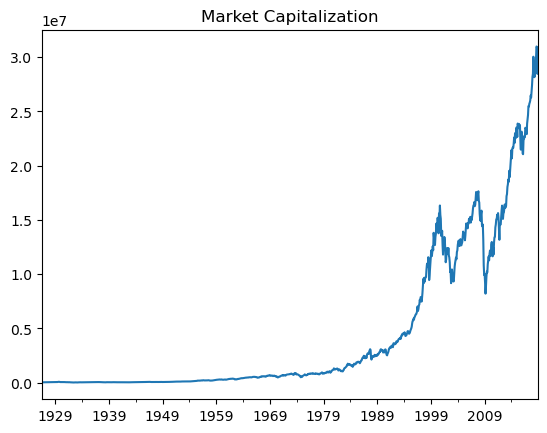

In [18]:
total_marketCap.plot.line(title = "Market Capitalization")

the market capitalization has dramatically gone up over time

In [19]:
# compute the cap weights
ind_capweight = ind_marketCap.divide(total_marketCap, axis = "rows")

In [21]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [23]:
ind_capweight["1926"].sum(axis="columns")

C:\Users\trann\AppData\Local\Temp\ipykernel_115488\1579460218.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ind_capweight["1926"].sum(axis="columns")


1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot: >

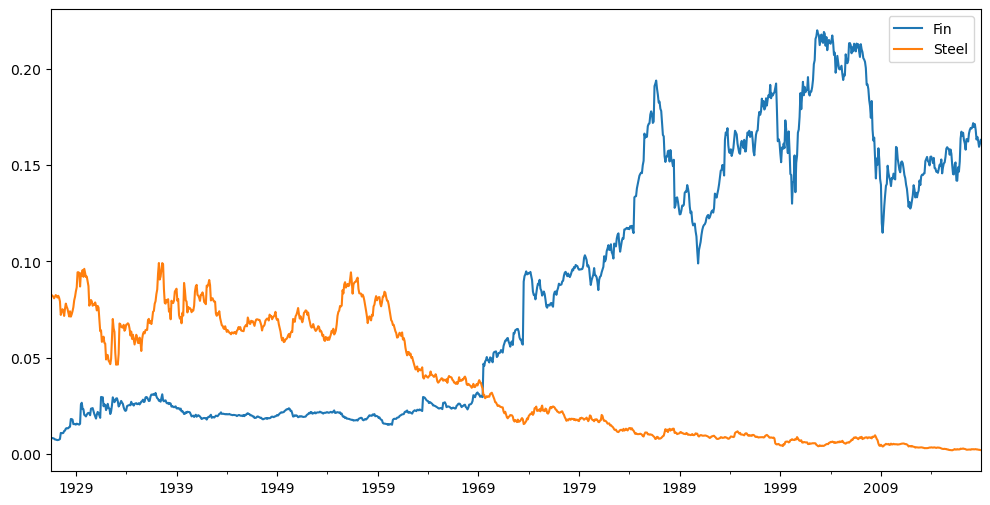

In [25]:
ind_capweight[["Fin","Steel"]].plot(figsize=(12,6))

In [26]:
total_market_return = (ind_capweight*ind_return).sum(axis="columns")

<AxesSubplot: title={'center': 'Total Market Return'}>

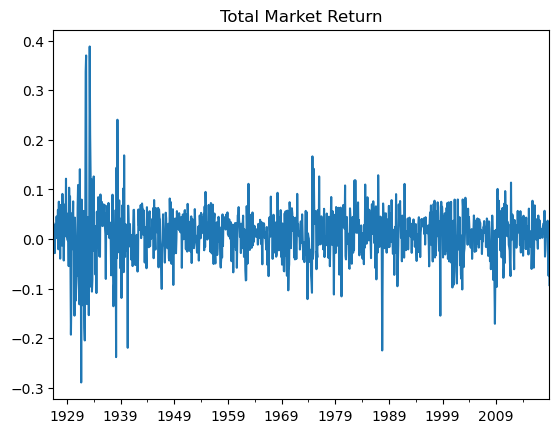

In [28]:
total_market_return.plot(title="Total Market Return")

<AxesSubplot: title={'center': 'Total Market CapWeight index 1926-2018'}>

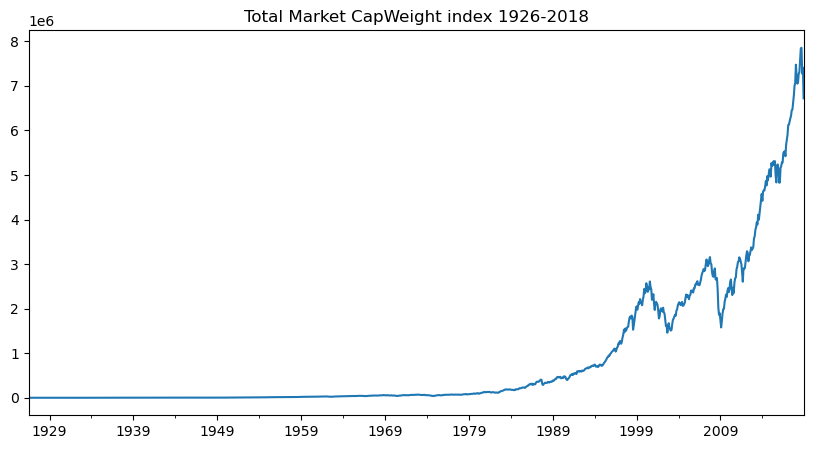

In [30]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title="Total Market CapWeight index 1926-2018")

<AxesSubplot: >

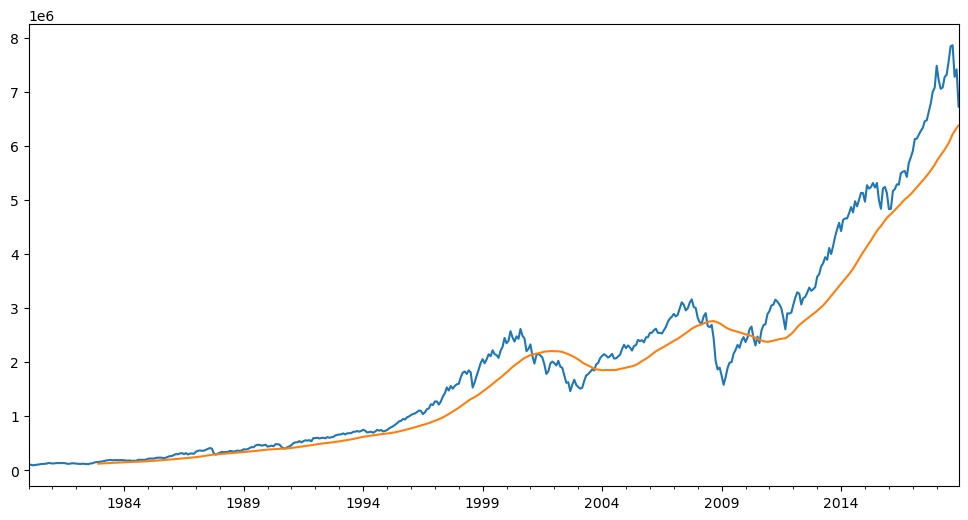

In [33]:
total_market_index["1980":].plot(figsize=(12,6))
### rolling() works with the timeseries (window =36 is 36 Months)
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,6))

<AxesSubplot: >

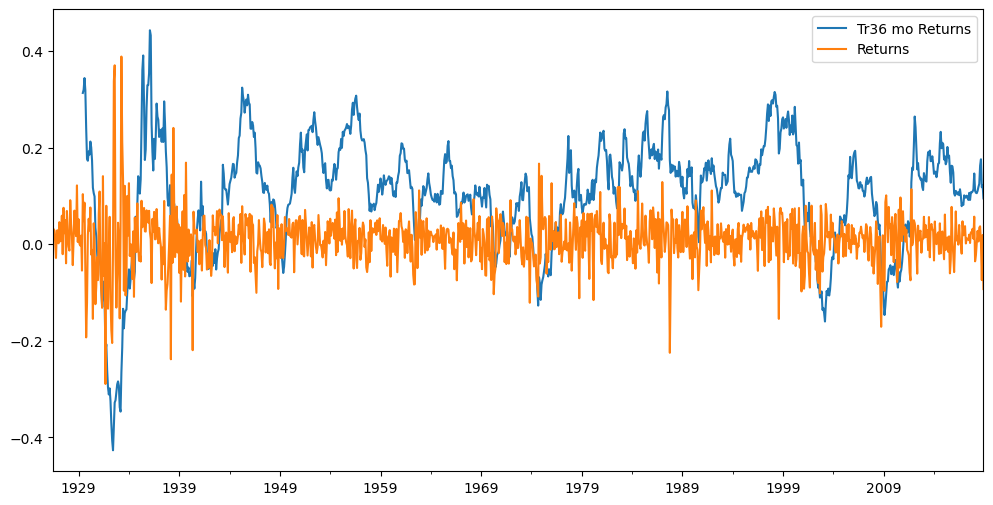

In [37]:
# total market index trailing 36 months returns
tmi_tr36rets =  total_market_return.rolling(window=36).aggregate(erk.annualize_returns, periods_per_year = 12)
tmi_tr36rets.plot(figsize=(12,6),label="Tr36 mo Returns", legend=True)
total_market_return.plot(label ="Returns", legend=True)

## Rolling Correlation - along with MultiIndexes  and .groupby

In [38]:
# compute the time series correlation (a squared matrix)
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

### Average correlation in 2018-12

In [41]:
ts_corr.index.names = ['date', 'industry']

In [43]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [44]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())

<AxesSubplot: xlabel='date'>

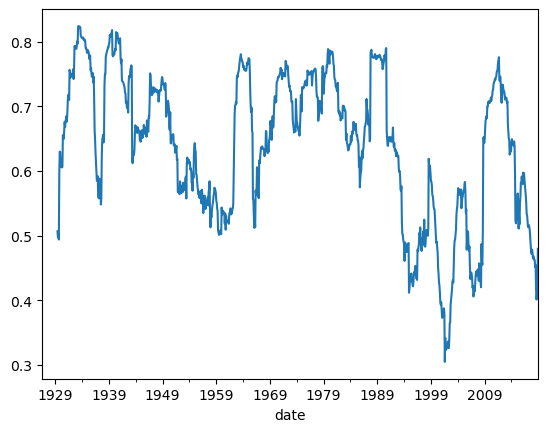

In [45]:
ind_tr36corr.plot()

<AxesSubplot: >

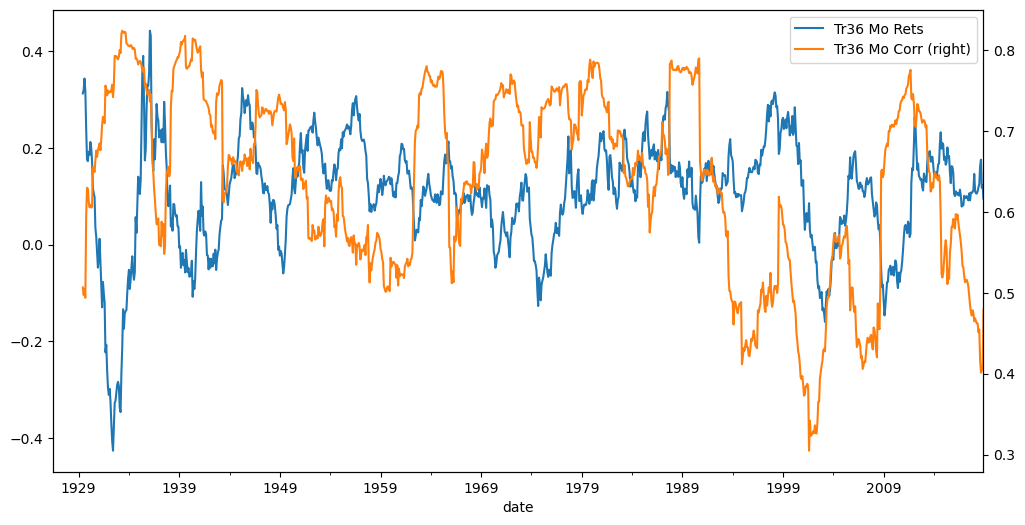

In [49]:
tmi_tr36rets.plot(label = "Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.plot(label = "Tr36 Mo Corr", figsize=(12,6), legend=True, secondary_y =True)


- Returns is the y_axis from the left and correlation is the y-axis from the right
- We see: When the market is tanking, correlation are rising, when the market is rising than correlation is sort of back to normal.

### what happened in 2007?

<AxesSubplot: >

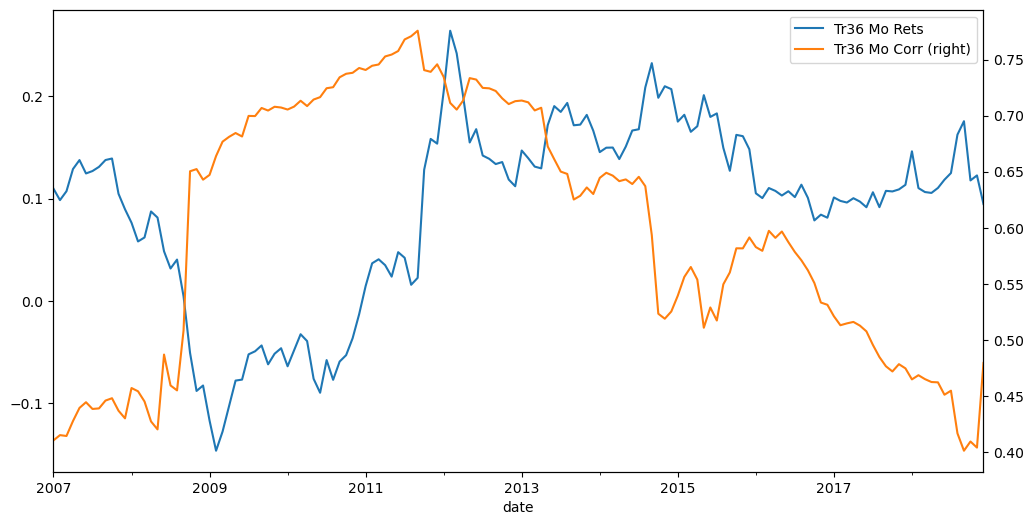

In [50]:
tmi_tr36rets["2007":].plot(label = "Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr["2007":].plot(label = "Tr36 Mo Corr", figsize=(12,6), legend=True, secondary_y =True)


In [51]:
# Compute the correlation between the trailing returns 
# and the trailing correlation(average corr)
tmi_tr36rets.corr(ind_tr36corr)

-0.2801006506288399

- We see that the correlation between the returns and the correlation is negativ
- Diversification doesn't help when the markets are crashing!!!